앙상블 학습을 통한 분류는 여러 개의 분류기를 생성하고그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법

#### 앙상블의 유형  
보팅   : 랜덤포레스트  
배깅   : 에이다 부스팅  
부스팅 : 그래디언트부스팅, XGBoost, LightGBM, CatBoost  

정형 데이터의 분류나 회귀에서는 GBM 부스팅 계열의 앙상블이 전반적으로 높은 예측 성능을 나타냄

## 앙상블의 특징  
단일 모델의 약점을 다수의 모델들을 결합하여 보완

성능이 떨어지더라도 서로 다른 유형의 모델을 섞는 것이오히려 전체 성능에 도움이 될 수 있음

랜덤 포레스트 및 뛰어난 부스팅 알고리즘들은 모두 결정 트리 알고리즘을 기반 알고리즘으로 적용함

결정트리의 단점인 과적합을 수 십~ 수 천개의 많은 분류기를 결합해 보완하고 장점인 직관적인 분류 기준은 강화됨

## 보팅과 배깅

보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 예측  

보팅 : 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합  
배깅 : 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행

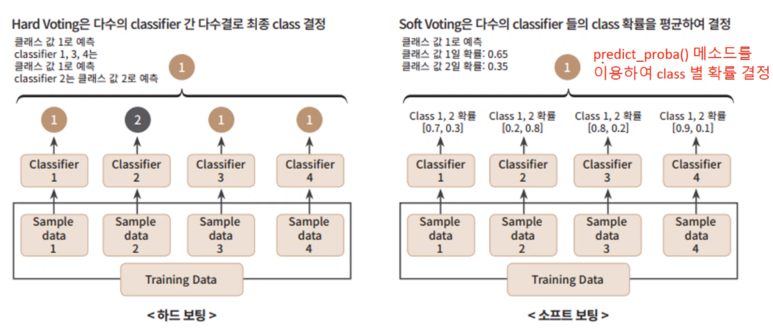

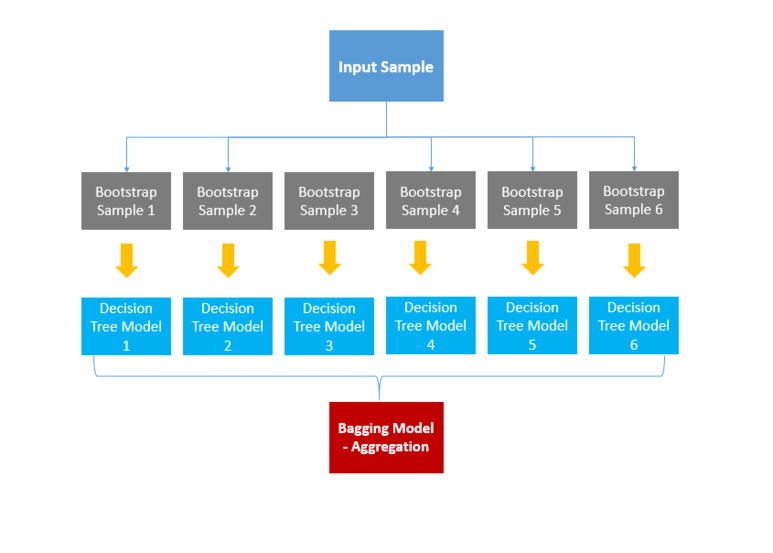

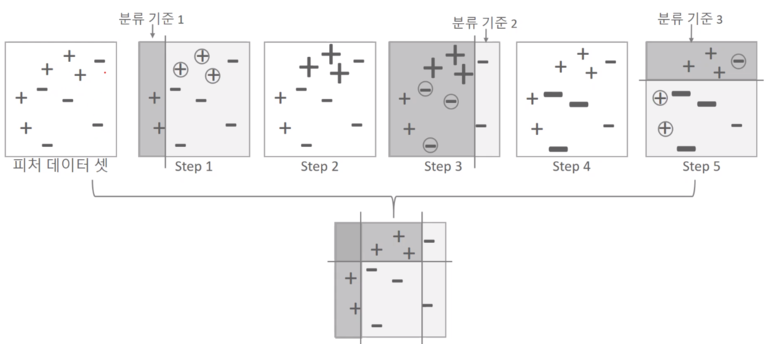

### 보팅 유형 - 하드보팅과 소프트보팅

하드보팅 : 다수결로 결정  
소프트보팅 : 클래스 별 확률(predict_proa())을 평균하여 결정

일반적으로 하드보팅보다는 소프트 보팅이 예측 성능이 상대적으로 우수하여 주로 사용됨  
사이킷런은 VotingClassifier 클래스를 통해 보팅 지원

# 4.3 앙상블

## Voting Classifier

### 위스콘신 유방암 데이터 로드

In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


### VotingClassifier로 개별모델은 로지스틱 회귀와 KNN을 보팅방식으로 결합하고 성능비교

In [2]:
# 개별모델은 로지스틱회귀와 KNN임.
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 8)

# 개별모델을 소프트보팅기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators = [('LR', lr_clf), ('KNN', knn_clf)], voting = 'soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   test_size = 0.2, random_state = 156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print("Voting 분류기 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print("{0} 정확도: {1:.4f}".format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


C:\Users\insight\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\insight\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

# 4.4 Random Forest

배깅의 대표적인 알고리즘 : 랜덤 포레스트

랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅방식으로 각자의 테이터를 샘플링해 개별적으로 학습을 수행한 뒤  
최종적으로 모든 분류기가 보팅을 통해 예측을결정

## 랜덤 포레스트의 부트스트래핑 분할

부트스트래핑(bootstrapping)분할 방식 : 여러 개의 데이터 세트를 중첩되게 분리하는 것

## 사이킷런 랜덤 포레스트 하이퍼 파라미터

n_estimators : 약한 학습기의 개수, 랜덤 포레스트에서 결정 트리의 개수, 디폴트 = 10  
max_features : 분할하는 피처를 참조할 때 전체 피처가 아니라 sqrt만큼 참조

###  결정트리에서 사용한 사용자 행동 인지 데이터 세트 로딩

In [3]:
import pandas as pd

def get_human_dataset():
    
    # 각 데이터 팡리들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt', sep = "\s+",
                                  header = None, names = ['column_index', 'column_name'])
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = feature_name_df.iloc[:, 1].unique().tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터를 DataFrame으로 로딩, 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep = '\s+', names = feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep = '\s+', names = feature_name)
    
    
    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 컬럼명은 action 으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt', sep = '\s+', header = None, names = ['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt', sep = '\s+',  header = None, names = ['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

## 학습/테스트 데이터로 분리하고 랜덤 포레스트로 학습/예측/평가

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성틍 평가
rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV로 교차검증 및 하이퍼 파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100],
    'max_depth':[6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

## 튜닝된 하이퍼 파라미터로 재 학습및 예측/평가

In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators = 300, max_depth = 10, min_samples_leaf = 8,
                               min_samples_split = 8, random_state = 0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print("예측 정확도 : {0:.4f}".format(accuracy_score(y_test, pred)))

## 개별 feature들의 중요도 시각화

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

plt.figure(figsize = (8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

## GBM 개요

가중치 업데이트를 경사 하강법을 이용  
오류식을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트

loss : 경사 하강법에서 사용할 비용함수  
learning_rate : 학습을 진행할 때마다 적용하는 학습률, 0~1 사이값, 기본값은 0.1, 너무 작은 값을 적용하면 업데이트 되는 값이 작아져서 최소 오류 값을 찾지 못할 수 있음  
n_estimator : 약한 학습기의 개수 기본값은 100

# 4.5 GBM(Gradient Boosting Machine)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함, 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))
print('GBM 수행시간 : {0:.4f}'.format(time.time() - start_time))

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate':[0.05, 0.1]
}

grid_cv = GridSearchCV(gb_clf, param_grid = params, cv = 2, verbose = 1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행.
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))

## XGBoost ( eXtra Gradient Boost)

뛰어난 예측성능  
GBM 대비 빠른 수행시간 - CPU 병렬처리, GPU 지원  
다양한 성능 향상기능 - 규제 기능 탑재, Tree Pruning(가지치기)  
다양한 편의 기능 - 조기중단, 자체 내장 된 교차검증, 결손값 자체 처리

## XGBoost 조기 중간 기능(Early Stopping)

XGBoost는 특정 반복 횟수 만큼 더 이상 비용함수가 감소하지 않으면 지정된 반복횟수를 다 완료하지 않고 수행을 종료할 수 있음  
학습을 위한 시간을 단축시킬 수 있음, 특히 최적화 튜닝 단계에서 적절하게 사용가능  
너무 반복 횟수를 단축할 경우 예측 성능 최적화가 안된 상태에서 학습이 종료될 수 있으므로 유의 필요  

early_stopping_rounds : 더 이상 비용 평가가 지표가 감소하지 않는 최대 반복횟수  
eval_metric : 반복 수행시 사용하는 비용 평가 지표  
eval_set : 평가를 진행하는 검증세트